## Modelagem matemático-computacional - projeto 5

### Projeto : Resolvendo PCV com Algoritmo genético

Prof.: Luciano da F. Costa

In [2]:
## importando as principais bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

### Demonstrando o problema

In [3]:
# M -> # de cidades
def create_cities(M):
    grid = np.array([np.linspace(0,1, 51), np.linspace(0,1,51)])
    cities_positions = np.array([np.array([random.choice(grid[0]),random.choice(grid[1])]) for i in range(0,M)])

    fig,axs = plt.subplots(figsize = (8,8))

    axs.set_xlabel('X', fontsize = 15)
    axs.set_ylabel('Y', fontsize = 15)
    axs.set_title('Posição das cidades', fontsize = 20)

    axs.plot(cities_positions[:,0], cities_positions[:,1],'D',color = 'black', markersize = 10, label = 'Cidades')

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    axs.grid()
    axs.legend(fontsize = 15)

    plt.xlim(0,1)
    plt.ylim(0,1)
    
    return cities_positions

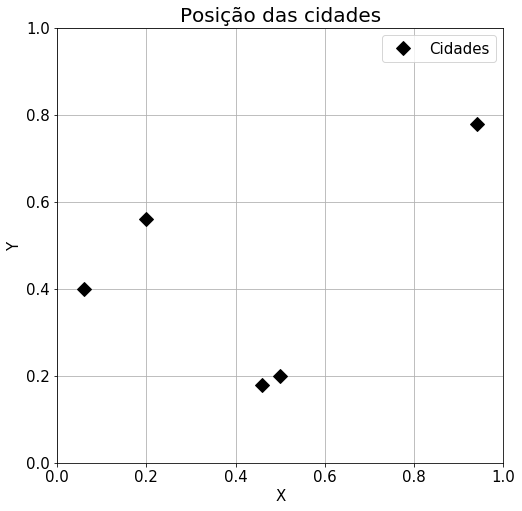

In [19]:
pos_cities = create_cities(5) 

In [28]:
def create_cities_validacao(M):
    grid = np.array([np.linspace(0,1, 51), np.linspace(0,1,51)])
    cities_positions = np.array([np.array([0.5+0.3*np.cos(i*2*np.pi/M),0.5+0.3*np.sin(i*2*np.pi/M)]) for i in range(0,M)])

    fig,axs = plt.subplots(figsize = (8,8))

    axs.set_xlabel('X', fontsize = 15)
    axs.set_ylabel('Y', fontsize = 15)
    axs.set_title('Posição das cidades', fontsize = 20)

    axs.plot(cities_positions[:,0], cities_positions[:,1],'D',color = 'black', markersize = 10, label = 'Cidades')

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    axs.grid()
    axs.legend(fontsize = 15)

    plt.xlim(0,1)
    plt.ylim(0,1)
    
    return cities_positions

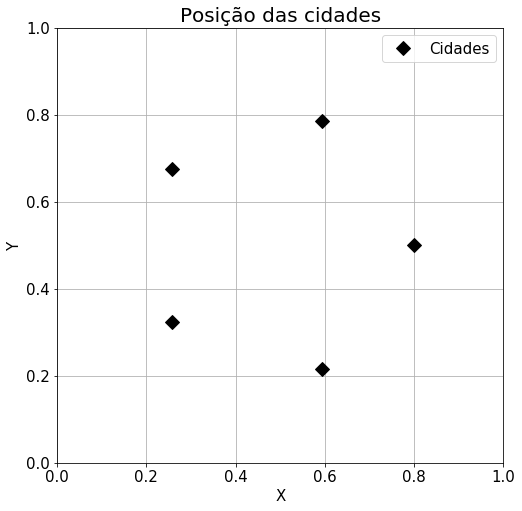

In [30]:
pos_cities_circular = create_cities_validacao(5)

Queremos que o algoritmo encontre o percurso que possui o menor caminho entre cidades geradas aleatoriamente, a distancia percorrida será o nosso parâmetro de seleção dos indivíduos. Vamos introduzir algumas rotinas que serão seguidas pelo algoritmo.

### Rotinas para diversificar nossos agentes

#### a) Mutação

In [5]:
def mutation(agente):
    i = 0;j=0;
    while(i==j):
        i,j = random.randint(0,len(agente)-1),random.randint(0,len(agente)-1)
    agente[i],agente[j] = agente[j], agente[i]
    return agente

#### b) Inversão

In [6]:
def invertion(agente):
    i,j = 0,0
    while(i == j or i > j):
        i,j = random.randint(0,len(agente)-1),random.randint(0,len(agente)-1)
        agente[i:j+1] = agente[i:j+1][::-1]
    return agente

#### c) Transposição

In [7]:
def transposition(agente, n = 3, i = 1, j = 5):
    agente[i:i+n], agente[j:j+n] = agente[j:j+n], agente[i:i+n]
    return agente

### Rotinas para o calculo das notas

#### a) Cálculo da distância

In [8]:
def distance(x1,x2):
    return np.array((x2[0] - x1[0])**2 + (x2[1] - x1[1])**2)

#### b) Cálculo das notas

In [17]:
def fitness(x1, cities):
    soma = 0
    for i in range(len(x1)-1):
        soma += distance(cities[x1[i]],cities[x1[i+1]])
    return soma

### Método de seleção dos indivíduos

#### a) Roleta genética

In [10]:
def create_roulette(fit):
    f_1 = [1 - ei/(sum(fit)) for ei in fit]
    
    N = sum(f_1)
    f_1 = np.array(f_1)/N
    
    rol = []
    pacul = 0
    for f in f_1:
        pacul += f
        rol.append(pacul)
    return rol

#### b) Seleciona indivíduos

In [11]:
def selection(rol):
    rd = np.random.uniform(0,1)
    
    for i in range(len(rol)):
        if(rd < rol[0]):
            return 0
        elif(rd > rol[i-1] and rd < rol[i]):
            return i
    return len(rol)-1

### Primeira população aleatória

In [15]:
## n_cities - > # de cidades 
## n_agents - > # de indivíduos
def first_population(n_cities, n_agents):
    pop = [random.sample(range(n_cities),n_cities) for i in range(n_agents)]
    return pop

### Exemplo com uma população de 5 agentes e sua respectiva roleta genética 

[1.5660000000000003, 1.9604000000000004, 1.7288000000000001, 1.2336000000000003, 0.7892000000000002]


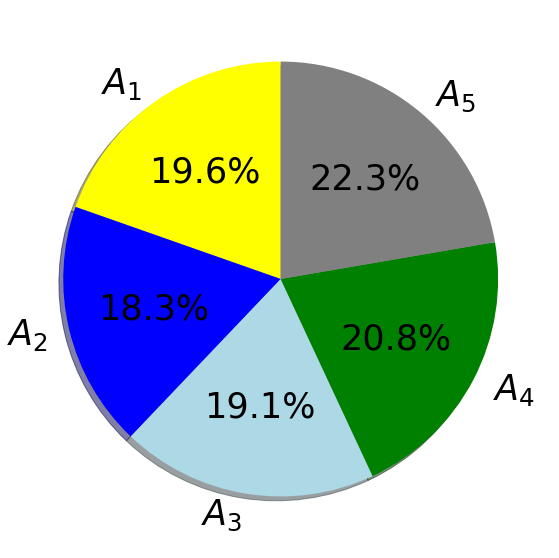

In [26]:
pop = first_population(5,5)
fits = [fitness(i, pos_cities) for i in pop]
roleta = create_roulette(fits)

aux = []
for i in range(len(roleta)):
    if i == 0:
        aux.append(roleta[i])
    if i > 0 and i < len(roleta):
        aux.append(roleta[i] - roleta[i-1])

labels = ['$A_1$','$A_2$','$A_3$','$A_4$','$A_5$']
#plt.rcParams['figure.figsize'] = (5,5)
print(fits)
colors = ['yellow','blue','lightblue','green','gray']
fig, axs = plt.subplots(figsize = (10,10))
axs.pie(aux,labels = labels, shadow = True, colors = colors, startangle = 90,autopct='%1.1f%%',textprops={'fontsize': 35})
plt.show()

In [52]:
def plot_solution(cities_positions, best_agent):
    fig,axs = plt.subplots(figsize = (8,8))

    axs.set_xlabel('X', fontsize = 15)
    axs.set_ylabel('Y', fontsize = 15)
    axs.set_title('Posição das cidades', fontsize = 20)

    axs.plot(cities_positions[:,0], cities_positions[:,1],'D',color = 'black', markersize = 10, label = 'Cidades')
    plt.plot(cities_positions[best_agent][:,0],cities_positions[best_agent][:,1], color = 'red', linewidth = 2, linestyle = '--')

    print(fitness(best_agent, cities_positions))
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    axs.grid()
    axs.legend(fontsize = 15)

    plt.xlim(0,1)
    plt.ylim(0,1)

### Efetuando simulação 

In [60]:
## n_epocas
## n_ind -> # de indivíduos
## pos_cities -> posição das cidades
## u_mut, u_inv, u_tran -> taxas de probabilidade de mutação, inversão e transposição

def run_ga(n_epocas,n_ind, pos_cities, u_mut, u_inv, u_tran):
    
    ## ------ Variáveis de retorno ------- ##
    menor_percurso = 1000
    melhor_individuo = list()
    notas_minimas = list()
    
    ## ------ Iniciando a população ------ ##
    pop = first_population(len(pos_cities), n_ind)
    notas = [fitness(individuo,pos_cities) for individuo in pop]
    
    ## ------ Adicionando os melhores iniciais ------ ##
    idmin = notas.index(min(notas))
    melhor_individuo = pop[idmin]
    menor_percurso = min(notas)
    notas_minimas.append(menor_percurso)
    
    ## ------ Lista com o melhor percurso encontrado ------ ##
    convergencia = list()
    convergencia.append(menor_percurso)
    
    ## ------ Iniciando iterações ----- ##
    for epoca in range(n_epocas):
        
        ## Gerando uma nova população
        roleta = create_roulette(notas)
        pop_auxiliar = list()
        
        for i in range(n_ind):
            novo_individuo = pop[selection(roleta)].copy()
            if(random.uniform(0,1)<u_mut): 
                novo_individuo = mutation(novo_individuo)
            if(random.uniform(0,1)<u_inv):
                novo_individuo = invertion(novo_individuo)
            if(random.uniform(0,1)<u_tran):
                novo_individuo = transposition(novo_individuo)
            pop_auxiliar.append(novo_individuo)
        
        ## Atualiza a geração 
        
        pop = pop_auxiliar.copy()
        notas = [fitness(individuo,pos_cities) for individuo in pop]
        
        ## Menor percurso da geração
        index_menor = notas.index(min(notas)) 
        notas_minimas.append(min(notas))
        
        ## Melhor indivíduo
        if(notas[index_menor] < menor_percurso):
            menor_percurso = notas[index_menor]
            melhor_individuo = pop[index_menor] 
        convergencia.append(menor_percurso)
    
    return convergencia, notas_minimas, melhor_individuo

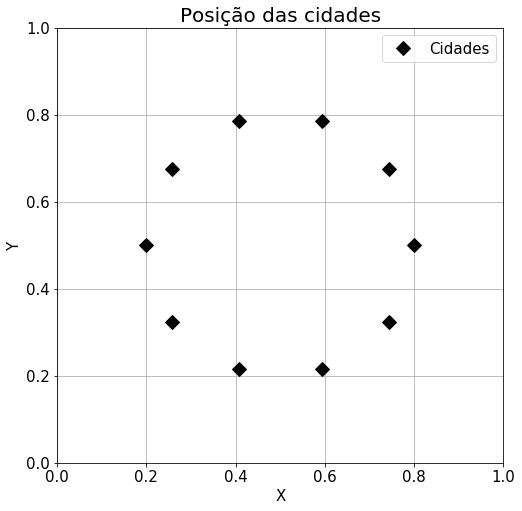

In [146]:
## --------- Gerando as cidades aleatóriamente ------- ##
pos_cities = create_cities_validacao(10)


0.30939246911258517


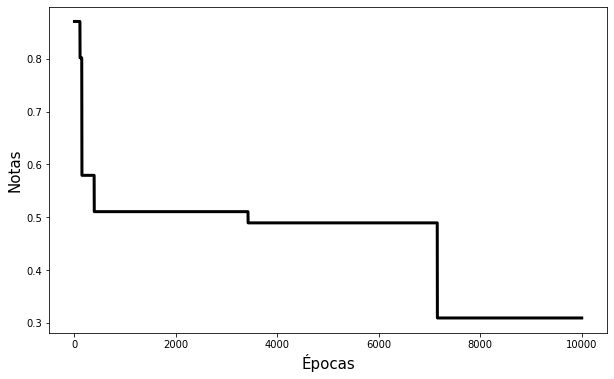

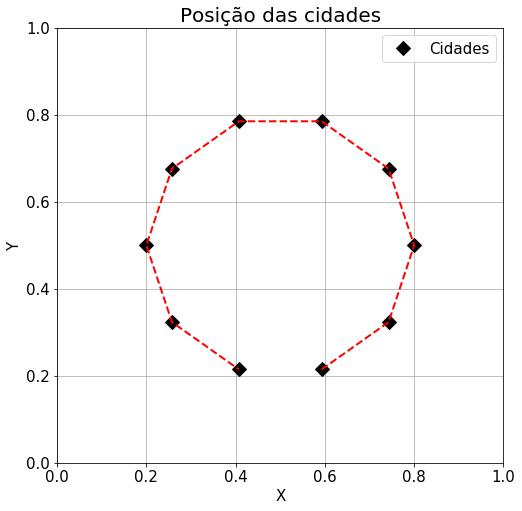

In [148]:
## --------- Parâmetros ----------- ##
u_mut = 1; u_inv = 0.5; u_tran = 0.1;
n_epocas = 10000
n_individuos = 10


convergencia, notas_minimas, melhor_individuo = run_ga(n_epocas,n_individuos, pos_cities, u_mut, u_inv, u_tran)

fig, axs = plt.subplots(figsize = (10,6))

axs.plot(np.arange(0,n_epocas+1), convergencia, linewidth = 3, color = 'black', label = 'Menor percurso')
#axs.plot(np.arange(0,n_epocas+1), notas_minimas, linewidth = 3, color = 'black', label = 'Menor percurso por época')

axs.set_ylabel('Notas', fontsize = 15)
axs.set_xlabel('Épocas', fontsize = 15)

plot_solution(pos_cities, melhor_individuo)


## Média de várias simulações

In [101]:
def ga_simulations(n_sim,n_individuos, n_epocas, pos_cities,u_mut, u_inv, u_tran):

    aver_convergencia, aver_notas, std = list(),list(),list()
    melhor_nota = 1000
    melhor_solucao = list()

    for i in range(n_sim):
        convergencia, notas_minimas, melhor_individuo = run_ga(n_epocas,n_individuos, pos_cities, u_mut, u_inv, u_tran)
        nota_aux = fitness(melhor_individuo, pos_cities)

        if(nota_aux < melhor_nota):
            melhor_nota = nota_aux
            melhor_solucao = melhor_individuo
        aver_convergencia.append(convergencia)
        aver_notas.append(notas_minimas)
    aver_convergencia = np.array(aver_convergencia)
    aver_notas = np.array(aver_notas)
    return np.mean(aver_convergencia, axis = 0), np.std(aver_convergencia,axis = 0), melhor_solucao 

### Observando o comportamento em função de $u_{mut}$

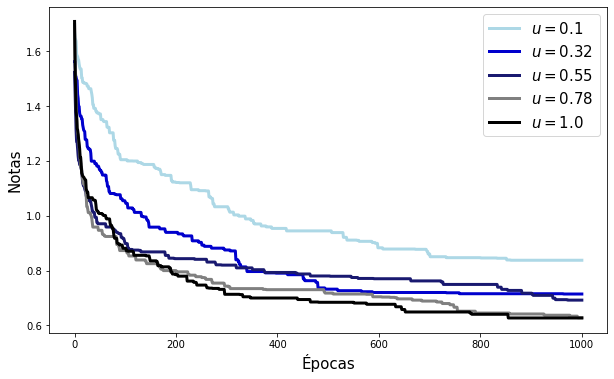

In [105]:
## --------- Parâmetros ----------- ##
u_mut = np.linspace(0.1,1,5); u_inv = 0.; u_tran = 0.;
n_epocas = 1000
n_individuos = 2
n_sim = 20

colors = ['lightblue','mediumblue','midnightblue','gray','black']

fig, axs = plt.subplots(figsize = (10,6))
for u, cor in zip(u_mut,colors):
    aver_convergencia, aver_notas, melhor_solucao = ga_simulations(n_sim,n_individuos, n_epocas, pos_cities,u, u_inv, u_tran)
    axs.plot(np.arange(0,n_epocas+1), aver_convergencia,color = cor, linewidth = 3, label = r'$u = {}$'.format(np.round(u,2)))

#axs.plot(np.arange(0,n_epocas+1), notas_minimas, linewidth = 3, color = 'black', label = 'Menor percurso por época')

axs.set_ylabel('Notas', fontsize = 15)
axs.set_xlabel('Épocas', fontsize = 15)
axs.legend(fontsize = 15)
#plot_solution(pos_cities, melhor_solucao)

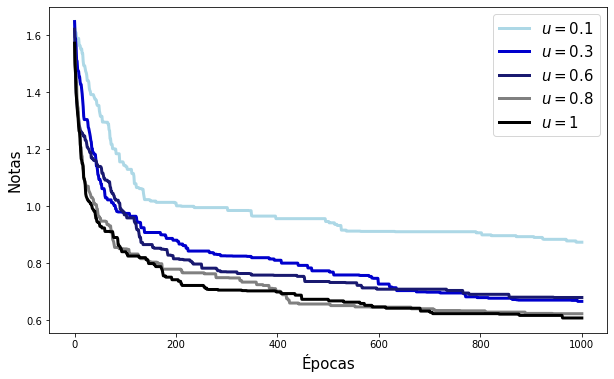

In [103]:
## --------- Parâmetros ----------- ##
u_mut = 0; u_inv = [0.1,0.3,0.6,0.8,1]; u_tran = 0.;
n_epocas = 1000
n_individuos = 2
n_sim = 20

###
colors = ['lightblue','mediumblue','midnightblue','gray','black']
fig, axs = plt.subplots(figsize = (10,6))
for u,cor in zip(u_inv, colors):
    aver_convergencia, aver_notas, melhor_solucao = ga_simulations(n_sim,n_individuos, n_epocas, pos_cities,u_mut, u, u_tran)
    axs.plot(np.arange(0,n_epocas+1), aver_convergencia,color = cor, linewidth = 3, label = r'$u = {}$'.format(np.round(u,2)))

#axs.plot(np.arange(0,n_epocas+1), notas_minimas, linewidth = 3, color = 'black', label = 'Menor percurso por época')

axs.set_ylabel('Notas', fontsize = 15)
axs.set_xlabel('Épocas', fontsize = 15)
axs.legend(fontsize = 15)

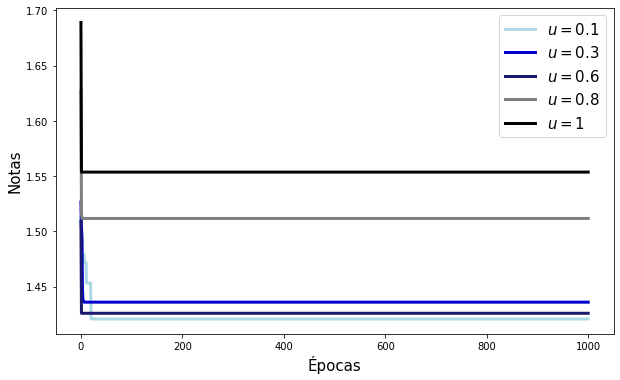

In [104]:
## --------- Parâmetros ----------- ##
u_mut = 0; u_inv = 0; u_tran = [0.1,0.3,0.6,0.8,1];
n_epocas = 1000
n_individuos = 2
n_sim = 20

###
colors = ['lightblue','mediumblue','midnightblue','gray','black']
fig, axs = plt.subplots(figsize = (10,6))
for u,cor in zip(u_tran, colors):
    aver_convergencia, aver_notas, melhor_solucao = ga_simulations(n_sim,n_individuos, n_epocas, pos_cities,u_mut, u_inv, u)
    axs.plot(np.arange(0,n_epocas+1), aver_convergencia,color = cor, linewidth = 3, label = r'$u = {}$'.format(np.round(u,2)))

#axs.plot(np.arange(0,n_epocas+1), notas_minimas, linewidth = 3, color = 'black', label = 'Menor percurso por época')

axs.set_ylabel('Notas', fontsize = 15)
axs.set_xlabel('Épocas', fontsize = 15)
axs.legend(fontsize = 15)

Observando os parâmetros isoladamente verifica-se que os melhores valores obtidos para as simulações com $n$ constante foram para $u_{mut}\rightarrow 1$, $u_{inv}\rightarrow 1$ e $u_{tran}=0.1$.

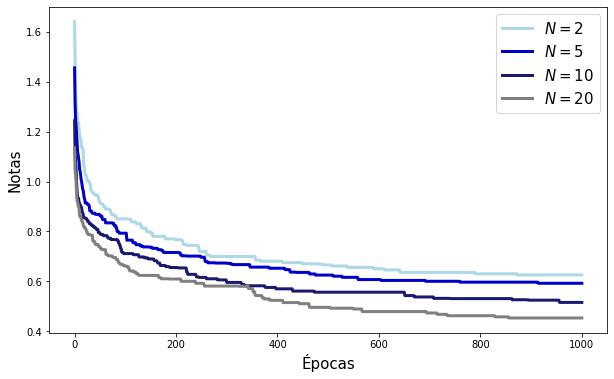

In [107]:
## --------- Parâmetros ----------- ##
u_mut = 1; u_inv = 1; u_tran = 0.1;
n_epocas = 1000
n_individuos = [2,5,10,20]
n_sim = 20

###
colors = ['lightblue','mediumblue','midnightblue','gray','black']
fig, axs = plt.subplots(figsize = (10,6))
for n,cor in zip(n_individuos, colors):
    aver_convergencia, aver_notas, melhor_solucao = ga_simulations(n_sim,n, n_epocas, pos_cities,u_mut, u_inv, u)
    axs.plot(np.arange(0,n_epocas+1), aver_convergencia,color = cor, linewidth = 3, label = r'$N = {}$'.format(np.round(n,2)))

#axs.plot(np.arange(0,n_epocas+1), notas_minimas, linewidth = 3, color = 'black', label = 'Menor percurso por época')

axs.set_ylabel('Notas', fontsize = 15)
axs.set_xlabel('Épocas', fontsize = 15)
axs.legend(fontsize = 15)

## Utilizando os melhores parâmetros

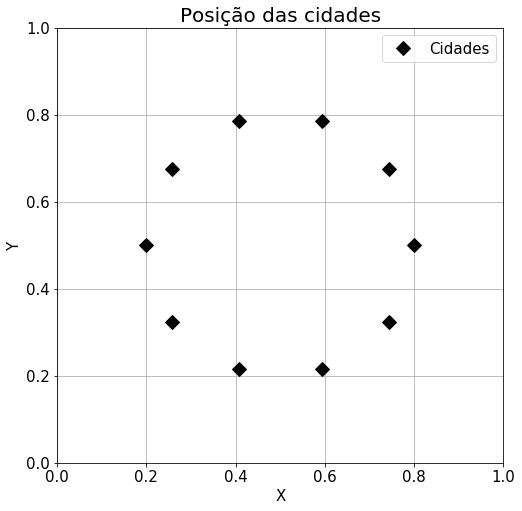

In [165]:
pos_cities = create_cities_validacao(10)

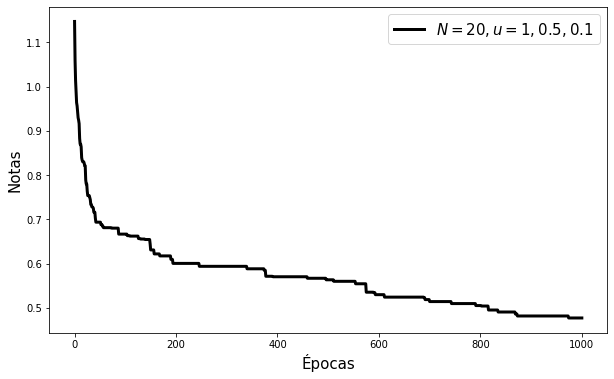

0.30939246911258517


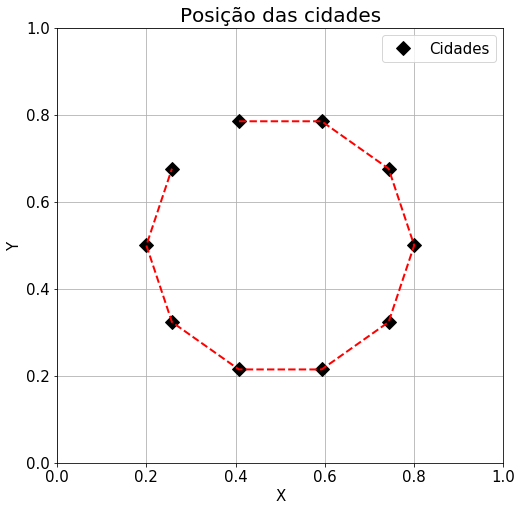

In [168]:
## --------- Parâmetros ----------- ##
u_mut = 1; u_inv = 0.5; u_tran = 0.1;
n_epocas = 1000
n_individuos = 20
n_sim = 20

###
fig, axs = plt.subplots(figsize = (10,6))

aver_convergencia, aver_notas, melhor_solucao = ga_simulations(n_sim,n_individuos, n_epocas, pos_cities,u_mut, u_inv, u)
yerr = np.array(len(aver_notas))

axs.plot(np.arange(0,n_epocas+1), aver_convergencia,color = 'k', linewidth = 3, label = r'$N = {},u = {},{},{}$'.format(np.round(n,2),np.round(u_mut,2),np.round(u_inv,2),np.round(u_tran,2)))


axs.set_ylabel('Notas', fontsize = 15)
axs.set_xlabel('Épocas', fontsize = 15)
axs.legend(fontsize = 15)

plt.show(True)


plot_solution(pos_cities, melhor_solucao)

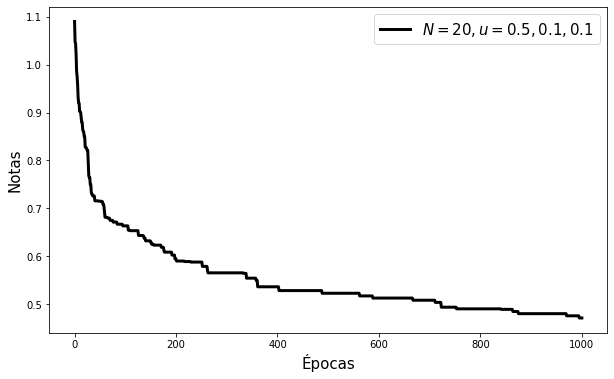

0.30939246911258517


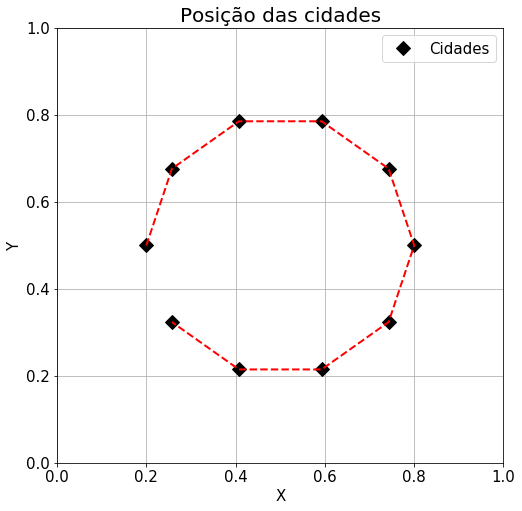

In [114]:
## --------- Parâmetros ----------- ##
u_mut = 0.5; u_inv = 0.1; u_tran = 0.1;
n_epocas = 1000
n_individuos = 20
n_sim = 20

###
fig, axs = plt.subplots(figsize = (10,6))

aver_convergencia, aver_notas, melhor_solucao = ga_simulations(n_sim,n_individuos, n_epocas, pos_cities,u_mut, u_inv, u)
axs.plot(np.arange(0,n_epocas+1), aver_convergencia,color = 'k', linewidth = 3, label = r'$N = {},u = {},{},{}$'.format(np.round(n,2),np.round(u_mut,2),np.round(u_inv,2),np.round(u_tran,2)))


axs.set_ylabel('Notas', fontsize = 15)
axs.set_xlabel('Épocas', fontsize = 15)
axs.legend(fontsize = 15)

plt.show(True)


plot_solution(pos_cities, melhor_solucao)

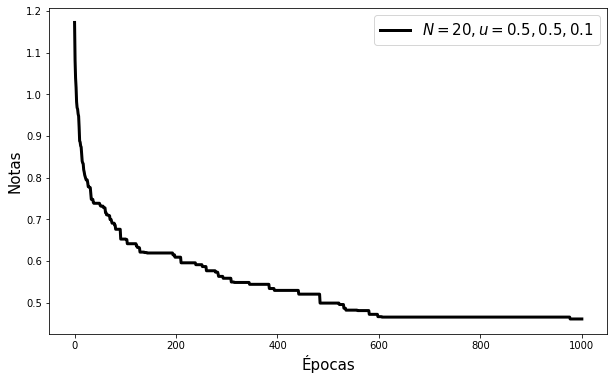

0.30939246911258517


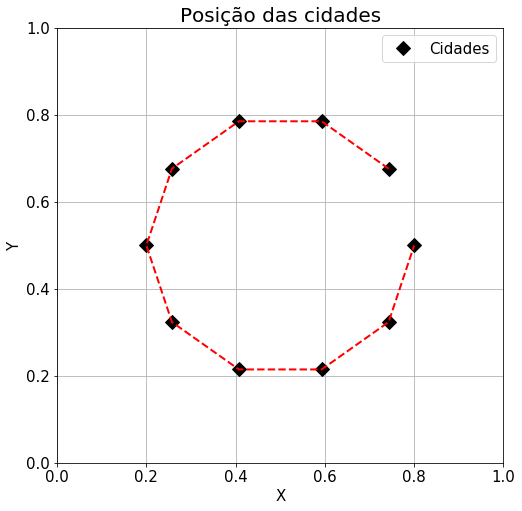

In [115]:
## --------- Parâmetros ----------- ##
u_mut = 0.5; u_inv = 0.5; u_tran = 0.1;
n_epocas = 1000
n_individuos = 20
n_sim = 20

###
fig, axs = plt.subplots(figsize = (10,6))

aver_convergencia, aver_notas, melhor_solucao = ga_simulations(n_sim,n_individuos, n_epocas, pos_cities,u_mut, u_inv, u)
axs.plot(np.arange(0,n_epocas+1), aver_convergencia,color = 'k', linewidth = 3, label = r'$N = {},u = {},{},{}$'.format(np.round(n,2),np.round(u_mut,2),np.round(u_inv,2),np.round(u_tran,2)))


axs.set_ylabel('Notas', fontsize = 15)
axs.set_xlabel('Épocas', fontsize = 15)
axs.legend(fontsize = 15)

plt.show(True)


plot_solution(pos_cities, melhor_solucao)

## Utilizando cidades randomicas

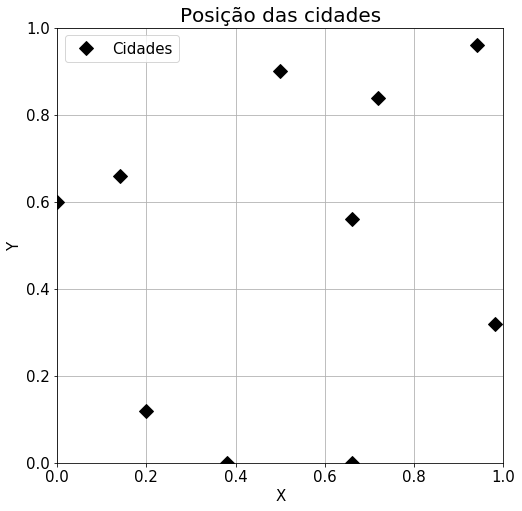

In [152]:
pos_cities = create_cities(10)

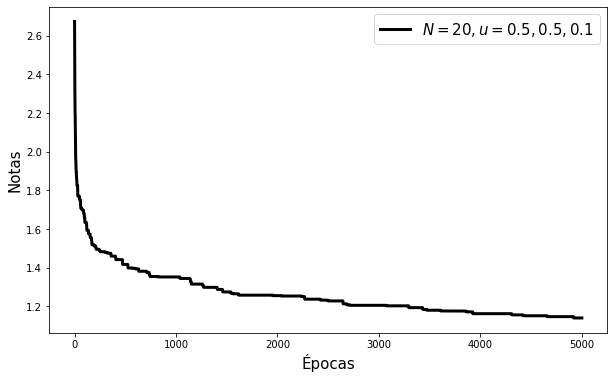

1.0396


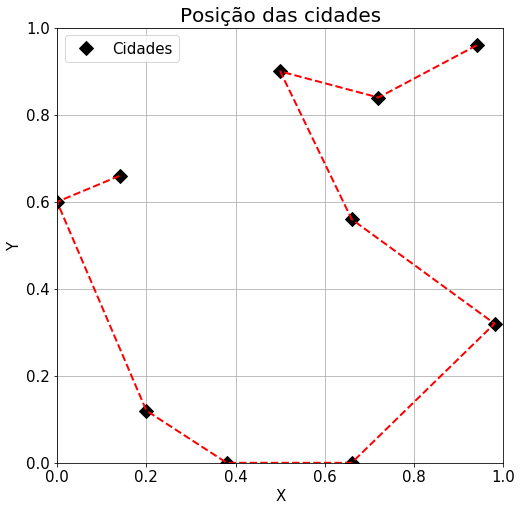

In [153]:
## --------- Parâmetros ----------- ##
u_mut = 0.5; u_inv = 0.5; u_tran = 0.1;
n_epocas = 5000
n_individuos = 20
n_sim = 20

###
fig, axs = plt.subplots(figsize = (10,6))

aver_convergencia, aver_notas, melhor_solucao = ga_simulations(n_sim,n_individuos, n_epocas, pos_cities,u_mut, u_inv, u)
axs.plot(np.arange(0,n_epocas+1), aver_convergencia,color = 'k', linewidth = 3, label = r'$N = {},u = {},{},{}$'.format(np.round(n,2),np.round(u_mut,2),np.round(u_inv,2),np.round(u_tran,2)))


axs.set_ylabel('Notas', fontsize = 15)
axs.set_xlabel('Épocas', fontsize = 15)
axs.legend(fontsize = 15)

plt.show(True)


plot_solution(pos_cities, melhor_solucao)

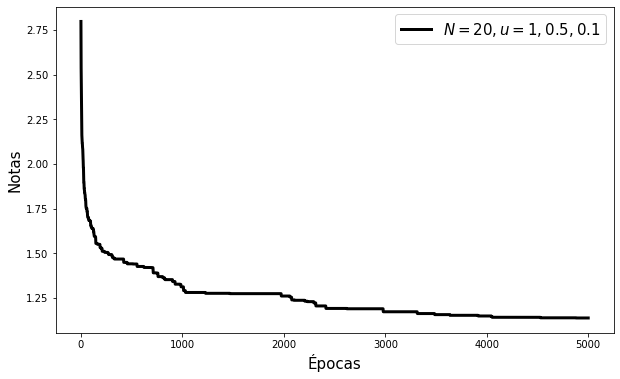

1.0395999999999999


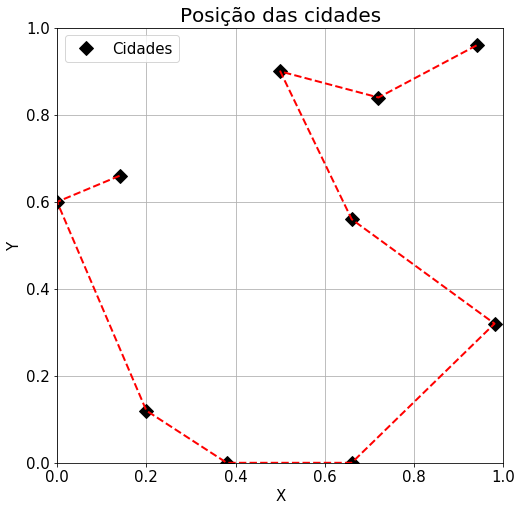

In [154]:
## --------- Parâmetros ----------- ##
u_mut = 1; u_inv = 0.5; u_tran = 0.1;
n_epocas = 5000
n_individuos = 20
n_sim = 20

###
fig, axs = plt.subplots(figsize = (10,6))

aver_convergencia, aver_notas, melhor_solucao = ga_simulations(n_sim,n_individuos, n_epocas, pos_cities,u_mut, u_inv, u)
axs.plot(np.arange(0,n_epocas+1), aver_convergencia,color = 'k', linewidth = 3, label = r'$N = {},u = {},{},{}$'.format(np.round(n,2),np.round(u_mut,2),np.round(u_inv,2),np.round(u_tran,2)))


axs.set_ylabel('Notas', fontsize = 15)
axs.set_xlabel('Épocas', fontsize = 15)
axs.legend(fontsize = 15)

plt.show(True)


plot_solution(pos_cities, melhor_solucao)